# CLASE KNN

## DATOS DE ADVERTISING

Datos obtenidos del libro ISLR

In [4]:
datos_advertising<-read.csv("Advertising.csv")

In [5]:
head(datos_advertising)

X,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2


In [6]:
summary(datos_advertising)

       X                TV             radio          newspaper     
 Min.   :  1.00   Min.   :  0.70   Min.   : 0.000   Min.   :  0.30  
 1st Qu.: 50.75   1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75  
 Median :100.50   Median :149.75   Median :22.900   Median : 25.75  
 Mean   :100.50   Mean   :147.04   Mean   :23.264   Mean   : 30.55  
 3rd Qu.:150.25   3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10  
 Max.   :200.00   Max.   :296.40   Max.   :49.600   Max.   :114.00  
     sales      
 Min.   : 1.60  
 1st Qu.:10.38  
 Median :12.90  
 Mean   :14.02  
 3rd Qu.:17.40  
 Max.   :27.00  

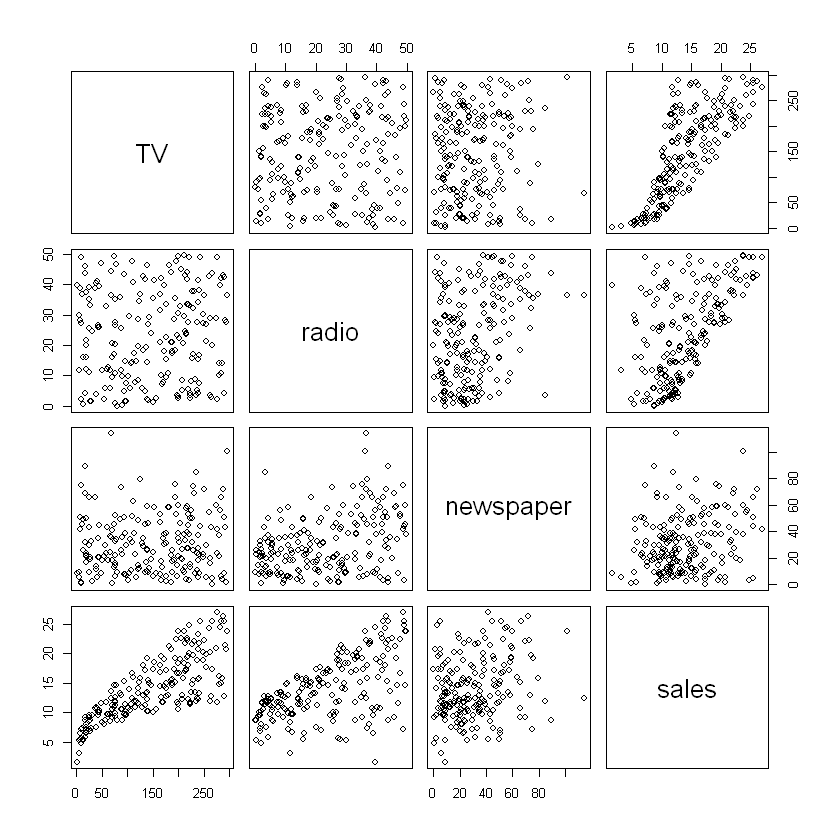

In [9]:
pairs(datos_advertising[2:5])

Dado que todas las unidades son en dolares, la interpretación visual es simple, hay una relación entre ventas y la cantidad invertida en publicidad en televisión, radio y periodicos

## Aplicación de KNN - Vecinos más cercanos - K nearest neigbor

###  1. Partición de muestra de entrenamiento y validación

In [10]:
set.seed(1)                  # fija la semilla del generador de números aleatorios para obtener resultados reproducibles
p_tr<-0.7                    #porcentaje de datos usados para el entrenamiento se asigna a la variable p_tr
N_datos<-dim(datos_advertising)[1]             # número de registros del conjunto de datos, componente 1 del vector dim
n_tr<-round(N_datos*p_tr)                      # este será el tamaño del conjunto de entrenamiento, se ajusta a entero
ix_tr<-sample(N_datos,n_tr,replace = FALSE)    # genera una muestra de índices de total N con una muestra n sin reemplazo
datos_tr<-datos_advertising[ix_tr,]            # conjunto de entrenamiento usando un subset con indices de ix_tr
datos_vl<-datos_advertising[-ix_tr,]           # conjunto de validación validación, con el complemento del indice subset

In [11]:
N_datos

[1] 200

In [12]:
n_tr

[1] 140

In [13]:
ix_tr

[1]  68 167 129 162  43  14 187  51  85  21 106 182  74   7  73  79  37 105
 [19] 110 165  34 190 126  89 172  33  84 163  70 188  42 166 111 148 156  20
 [37]  44 121  87 176 173  40  25 119 122  39 170 134  24 195 130  45 146  22
 [55] 115 104 161 144 145 103  75  13 159 177  23 189 174 141  29 108  48 175
 [73] 149 191  31 102  17 186 133 197  83 118 114  90 150 107  64  94 179  96
 [91] 169  60 193  93 180  10   1 196  59  26  15  58 132 152 154 116  76 155
[109]  97  53  86 138 120  35 135 142  98  78 147 143  28 184  61  46  67  71
[127] 131 164  49 109  56  72  50 194 181  92 171  91  16  19

In [14]:
head(datos_tr)

,X,TV,radio,newspaper,sales
68,68,139.3,14.5,10.2,13.4
167,167,17.9,37.6,21.6,8.0
129,129,220.3,49.0,3.2,24.7
162,162,85.7,35.8,49.3,13.3
43,43,293.6,27.7,1.8,20.7
14,14,97.5,7.6,7.2,9.7


El siguiente código implementa el método de los vecinos más cercanos del paquete caret. Luego utiliza la función predict() para predecir los datos de entrenamiento y calcula el MSE:

In [15]:
library(caret) # contiene una implementación del método de los kNN

Loading required package: lattice
Loading required package: ggplot2


In [16]:
adv_knn<-knnreg(sales~TV+radio+newspaper,data=datos_tr,k=3) # evalúa el método con k=3
y_tr_pred<-predict(adv_knn,datos_tr)
mse_tr<-mean((datos_tr$sales-y_tr_pred)^2) # calcula el mse de entrenamiento
(mse_tr)

[1] 1.2775

El siguiente código permite calcular el MSE en el conjunto de validación:

In [20]:
y_vl_pred<-predict(adv_knn,datos_vl)  #predicción de resultados en el conjunto de validación
mse_vl<-mean((datos_vl$sales-y_vl_pred)^2)
mse_vl

[1] 1.524037

Se observa que el error MSE es mayor en el conjunto de validación que en el conjunto de entrenamiento

## ¿Cuál es el número de vecinos óptimo?

Se crea un función en R que para un valor de K dado, realiza los calculos anteriores y retorna el MSE

In [22]:
mse_k <- function(k,data_tr,data_vl,formula_mod) {
    # k es el numero de vecinos a utilizar
    # data_tr: dataframe con datos de entrenamiento
    # data_vl:  dataframe con datos de validación
    # formula_mod:  modelo<-formula("sales~TV+radio+newspaper")
  adv_knn <- knnreg(formula_mod,data=datos_tr,k=k) # entrenamiento del modelo
  y_tr_pred <- predict(adv_knn,datos_tr) # predicción de los valores de entrenamiento
  mse_tr <- mean((datos_tr$sales-y_tr_pred)^2) # mse del entrenamiento
  y_vl_pred <- predict(adv_knn,datos_vl) # predicción de los valores de prueba
  mse_vl <- mean((datos_vl$sales-y_vl_pred)^2) # mse de validación
  return(list(mse_tr=mse_tr,mse_vl=mse_vl))
  }

Uso de la función para k=2

In [23]:
modelo <- formula("sales~TV+radio+newspaper")
mse_k(k=2,data_tr=data_tr,data_vl = data_vl,formula_mod = modelo)

$mse_tr
[1] 0.9094643

$mse_vl
[1] 1.401417

Ahora se usa la función lapply (que viene en R) para aplicar la función mse_k a un vector de k

In [24]:
MSE<-lapply(1:n_tr,mse_k,data_tr=data_tr,data_vl = data_vl,formula_mod = modelo)  #se observa que el vector suministrado
#corresponde a los numero de k desde 1 hasta el numero de elementos del vector de entrenamiento, admeás
#en la funcion lapply se suministran los demás valores de los parámetros de la función mse_k, y la función
#mse_k va como segundo argumento de lapply

In [25]:
MSE

[[1]]
[[1]]$mse_tr
[1] 0

[[1]]$mse_vl
[1] 2.338167


[[2]]
[[2]]$mse_tr
[1] 0.9094643

[[2]]$mse_vl
[1] 1.401417


[[3]]
[[3]]$mse_tr
[1] 1.2775

[[3]]$mse_vl
[1] 1.524037


[[4]]
[[4]]$mse_tr
[1] 1.608219

[[4]]$mse_vl
[1] 1.467594


[[5]]
[[5]]$mse_tr
[1] 1.811891

[[5]]$mse_vl
[1] 1.55526


[[6]]
[[6]]$mse_tr
[1] 1.940067

[[6]]$mse_vl
[1] 1.573074


[[7]]
[[7]]$mse_tr
[1] 2.206882

[[7]]$mse_vl
[1] 1.878714


[[8]]
[[8]]$mse_tr
[1] 2.533729

[[8]]$mse_vl
[1] 2.285214


[[9]]
[[9]]$mse_tr
[1] 2.910122

[[9]]$mse_vl
[1] 2.997498


[[10]]
[[10]]$mse_tr
[1] 3.247908

[[10]]$mse_vl
[1] 3.1238


[[11]]
[[11]]$mse_tr
[1] 3.559438

[[11]]$mse_vl
[1] 3.354985


[[12]]
[[12]]$mse_tr
[1] 3.868968

[[12]]$mse_vl
[1] 3.901543


[[13]]
[[13]]$mse_tr
[1] 4.137853

[[13]]$mse_vl
[1] 3.99195


[[14]]
[[14]]$mse_tr
[1] 4.358928

[[14]]$mse_vl
[1] 4.173071


[[15]]
[[15]]$mse_tr
[1] 4.589706

[[15]]$mse_vl
[1] 4.401832


[[16]]
[[16]]$mse_tr
[1] 4.70316

[[16]]$mse_vl
[1] 4.428994


[[17]]
[[17]]$mse_tr
[1] 5.004809

[[17]]$mse_vl
[1] 4.721803


[[18]]
[[18]]$mse_tr
[1] 5.237437

[[18]]$mse_vl
[1] 5.075801


[[19]]
[[19]]$mse_tr
[1] 5.386329

[[19]]$mse_vl
[1] 4.977001


[[20]]
[[20]]$mse_tr
[1] 5.55504

[[20]]$mse_vl
[1] 5.350538


[[21]]
[[21]]$mse_tr
[1] 5.628275

[[21]]$mse_vl
[1] 5.57196


[[22]]
[[22]]$mse_tr
[1] 5.717859

[[22]]$mse_vl
[1] 5.660503


[[23]]
[[23]]$mse_tr
[1] 5.864275

[[23]]$mse_vl
[1] 5.889767


[[24]]
[[24]]$mse_tr
[1] 5.993817

[[24]]$mse_vl
[1] 6.14642


[[25]]
[[25]]$mse_tr
[1] 6.113791

[[25]]$mse_vl
[1] 6.136174


[[26]]
[[26]]$mse_tr
[1] 6.209145

[[26]]$mse_vl
[1] 6.397335


[[27]]
[[27]]$mse_tr
[1] 6.474759

[[27]]$mse_vl
[1] 6.633709


[[28]]
[[28]]$mse_tr
[1] 6.752694

[[28]]$mse_vl
[1] 6.798588


[[29]]
[[29]]$mse_tr
[1] 6.882828

[[29]]$mse_vl
[1] 6.956624


[[30]]
[[30]]$mse_tr
[1] 7.051572

[[30]]$mse_vl
[1] 7.208731


[[31]]
[[31]]$mse_tr
[1] 7.261396

[[31]]$mse_vl
[1] 7.3906


[[32]]
[[32]]$mse_tr
[1] 7.471449

[[32]]$mse_vl
[1] 7.484944


[[33]]
[[33]]$mse_tr
[1] 7.685325

[[33]]$mse_vl
[1] 7.772045


[[34]]
[[34]]$mse_tr
[1] 7.906918

[[34]]$mse_vl
[1] 7.761912


[[35]]
[[35]]$mse_tr
[1] 8.038571

[[35]]$mse_vl
[1] 7.961934


[[36]]
[[36]]$mse_tr
[1] 8.242972

[[36]]$mse_vl
[1] 8.082939


[[37]]
[[37]]$mse_tr
[1] 8.420783

[[37]]$mse_vl
[1] 8.244391


[[38]]
[[38]]$mse_tr
[1] 8.542337

[[38]]$mse_vl
[1] 8.356111


[[39]]
[[39]]$mse_tr
[1] 8.773193

[[39]]$mse_vl
[1] 8.454196


[[40]]
[[40]]$mse_tr
[1] 8.951864

[[40]]$mse_vl
[1] 8.649369


[[41]]
[[41]]$mse_tr
[1] 9.077805

[[41]]$mse_vl
[1] 8.733454


[[42]]
[[42]]$mse_tr
[1] 9.165617

[[42]]$mse_vl
[1] 8.874634


[[43]]
[[43]]$mse_tr
[1] 9.189582

[[43]]$mse_vl
[1] 9.02949


[[44]]
[[44]]$mse_tr
[1] 9.378185

[[44]]$mse_vl
[1] 9.03225


[[45]]
[[45]]$mse_tr
[1] 9.490308

[[45]]$mse_vl
[1] 9.091222


[[46]]
[[46]]$mse_tr
[1] 9.650059

[[46]]$mse_vl
[1] 9.096751


[[47]]
[[47]]$mse_tr
[1] 9.791864

[[47]]$mse_vl
[1] 9.110254


[[48]]
[[48]]$mse_tr
[1] 9.862613

[[48]]$mse_vl
[1] 9.151501


[[49]]
[[49]]$mse_tr
[1] 9.990666

[[49]]$mse_vl
[1] 9.308439


[[50]]
[[50]]$mse_tr
[1] 10.15402

[[50]]$mse_vl
[1] 9.452003


[[51]]
[[51]]$mse_tr
[1] 10.29179

[[51]]$mse_vl
[1] 9.520417


[[52]]
[[52]]$mse_tr
[1] 10.41382

[[52]]$mse_vl
[1] 9.617462


[[53]]
[[53]]$mse_tr
[1] 10.5088

[[53]]$mse_vl
[1] 9.757824


[[54]]
[[54]]$mse_tr
[1] 10.58854

[[54]]$mse_vl
[1] 9.976764


[[55]]
[[55]]$mse_tr
[1] 10.75067

[[55]]$mse_vl
[1] 10.09675


[[56]]
[[56]]$mse_tr
[1] 10.85576

[[56]]$mse_vl
[1] 10.22581


[[57]]
[[57]]$mse_tr
[1] 10.9222

[[57]]$mse_vl
[1] 10.29825


[[58]]
[[58]]$mse_tr
[1] 11.03499

[[58]]$mse_vl
[1] 10.43315


[[59]]
[[59]]$mse_tr
[1] 11.17423

[[59]]$mse_vl
[1] 10.58785


[[60]]
[[60]]$mse_tr
[1] 11.25807

[[60]]$mse_vl
[1] 10.63422


[[61]]
[[61]]$mse_tr
[1] 11.32672

[[61]]$mse_vl
[1] 10.6604


[[62]]
[[62]]$mse_tr
[1] 11.42451

[[62]]$mse_vl
[1] 10.80163


[[63]]
[[63]]$mse_tr
[1] 11.49485

[[63]]$mse_vl
[1] 10.90629


[[64]]
[[64]]$mse_

El objeto MSE es una lista de listas: cada entrada de MSE es una lista con dos componentes. Para acceder a sus elementos de manera organizada pordemos utilizar la función "**`[`**" y la función **sapply()** como se muestra: 

In [26]:
mse_tr<-sapply(1:n_tr,function(x,y){`[[`(y,x)$mse_tr},y=MSE)
mse_vl<-sapply(1:n_tr,function(x,y){`[[`(y,x)$mse_vl},y=MSE)

In [29]:
mse_tr[1:10]

[1] 0.0000000 0.9094643 1.2775000 1.6082187 1.8118914 1.9400675 2.2068818
 [8] 2.5337288 2.9101217 3.2479079

In [30]:
mse_vl[1:10]

[1] 2.338167 1.401417 1.524037 1.467594 1.555260 1.573074 1.878714 2.285214
 [9] 2.997498 3.123800

Ahora ya pueden graficarse los MSE de entrenamiento y validación en función del número de vecinos:

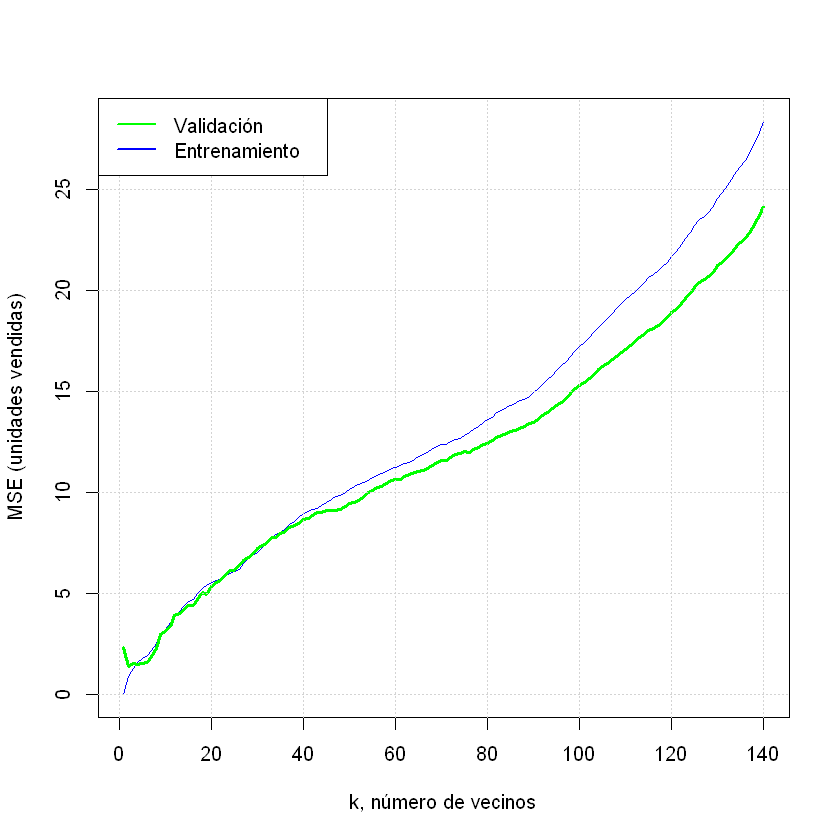

In [36]:
num_vec<-1:n_tr
plot(num_vec,mse_tr,type="l",col="blue",lwd=1,xlab="k, número de vecinos",
     ylab="MSE (unidades vendidas)")
lines(num_vec,mse_vl,col="green",lwd=3)
grid()
legend("topleft",col=c("green","blue"),lwd=2,
       legend=c("Validación","Entrenamiento"))

Haciendo un zoom en los elementos cercanos al mínimo MSE según K, un k optimo estaría entre k=2 y k=4

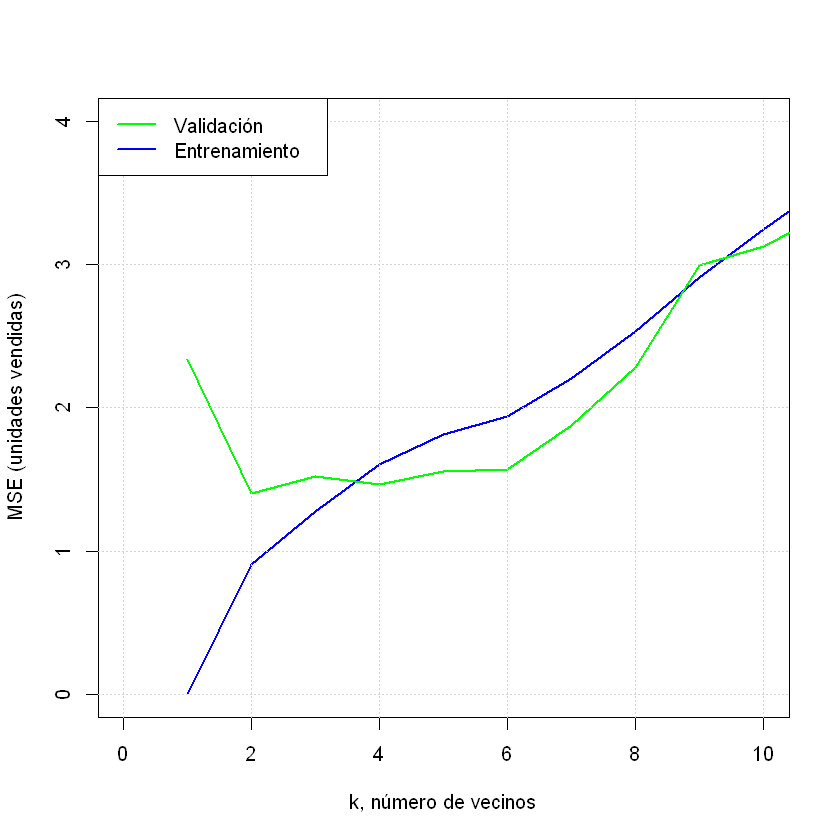

In [38]:
num_vec<-1:n_tr
plot(num_vec,mse_tr,type="l",col="blue",lwd=2,xlab="k, número de vecinos",
     ylab="MSE (unidades vendidas)",xlim=c(0,10),ylim=c(0,4))
lines(num_vec,mse_vl,col="green",lwd=2)
grid()
legend("topleft",col=c("green","blue"),lwd=2,
       legend=c("Validación","Entrenamiento"))